In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train_df = pd.read_csv("adikara-2025-indonesia-kredit-macet/train.csv")

train_df.head()

,id_transaksi,tanggal_pencairan,provinsi,jenis_pinjaman,status_peminjam,jumlah_pinjaman,total_pengembalian,durasi_hari,porsi_pengembalian_lender,sektor_usaha,pendidikan,jenis_jaminan,status_gagal_bayar
0,1,2023-08-01,Jawa Barat,Modal_Usaha,Peminjam_Berulang,959000.0,959000.0,7.0,287000.0,Digital,D3,Sertifikat,0
1,2,2023-08-12,Jawa Tengah,Modal_Usaha,Peminjam_Berulang,55000.0,55000.0,7.0,16000.0,Kuliner,S2,SK_Pegawai,0
2,3,2023-08-05,Jawa Barat,Modal_Usaha,Peminjam_Berulang,655000.0,666000.0,7.0,199000.0,Digital,SMA,Sertifikat,0
3,4,2025-10-28,Jawa Tengah,Mikro_UKM,Peminjam_Berulang,611000.0,632000.0,7.0,126000.0,Kuliner,S1,BPKB,0
4,5,2023-09-09,Jawa Timur,Modal_Usaha,Peminjam_Berulang,573000.0,573000.0,7.0,127000.0,Perdagangan,S2,Tanpa_Jaminan,0


In [3]:
train_df.describe()

,id_transaksi,jumlah_pinjaman,total_pengembalian,durasi_hari,porsi_pengembalian_lender,status_gagal_bayar
count,20012.000000,2.001200e+04,1.794700e+04,19212.000000,1.805200e+04,20012.000000
mean,10006.500000,2.098989e+06,2.273859e+06,9.042890,3.625138e+05,0.050270
std,5777.111129,2.480480e+07,2.977060e+07,17.726719,2.489810e+06,0.218507
min,1.000000,0.000000e+00,0.000000e+00,-1.000000,0.000000e+00,0.000000
25%,5003.750000,2.750000e+05,2.800000e+05,7.000000,3.000000e+04,0.000000
50%,10006.500000,6.360000e+05,6.560000e+05,7.000000,1.150000e+05,0.000000
75%,15009.250000,1.384000e+06,1.429000e+06,7.000000,2.870000e+05,0.000000
max,20012.000000,2.580849e+09,2.851838e+09,1096.000000,2.182670e+08,1.000000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20012 entries, 0 to 20011
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_transaksi               20012 non-null  int64  
 1   tanggal_pencairan          20012 non-null  object 
 2   provinsi                   20012 non-null  object 
 3   jenis_pinjaman             19543 non-null  object 
 4   status_peminjam            20012 non-null  object 
 5   jumlah_pinjaman            20012 non-null  float64
 6   total_pengembalian         17947 non-null  float64
 7   durasi_hari                19212 non-null  float64
 8   porsi_pengembalian_lender  18052 non-null  float64
 9   sektor_usaha               20012 non-null  object 
 10  pendidikan                 20012 non-null  object 
 11  jenis_jaminan              20012 non-null  object 
 12  status_gagal_bayar         20012 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usag

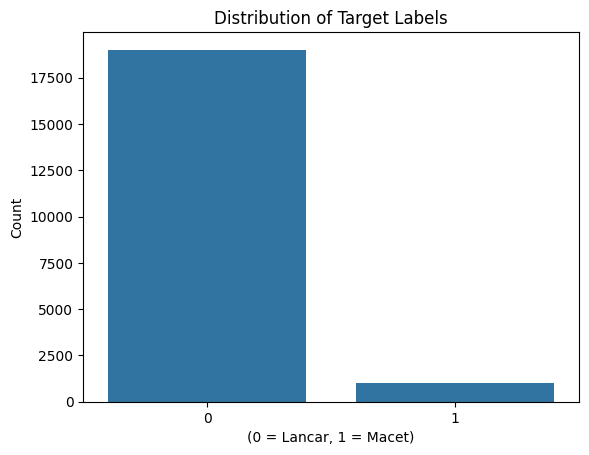

In [5]:
sns.countplot(data=train_df, x='status_gagal_bayar')
plt.title('Distribution of Target Labels')
plt.xlabel('(0 = Lancar, 1 = Macet)')
plt.ylabel('Count')
plt.show()

In [6]:
train_df.count()

id_transaksi                 20012
tanggal_pencairan            20012
provinsi                     20012
jenis_pinjaman               19543
status_peminjam              20012
jumlah_pinjaman              20012
total_pengembalian           17947
durasi_hari                  19212
porsi_pengembalian_lender    18052
sektor_usaha                 20012
pendidikan                   20012
jenis_jaminan                20012
status_gagal_bayar           20012
dtype: int64

In [7]:
import pandas as pd

dropped_df = train_df.dropna(subset=['total_pengembalian'])
dropped_df = dropped_df.dropna(subset=['porsi_pengembalian_lender'])
dropped_df = dropped_df.dropna(subset=['jenis_pinjaman'])
dropped_df = dropped_df.dropna(subset=['durasi_hari'])

In [8]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15214 entries, 0 to 20011
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_transaksi               15214 non-null  int64  
 1   tanggal_pencairan          15214 non-null  object 
 2   provinsi                   15214 non-null  object 
 3   jenis_pinjaman             15214 non-null  object 
 4   status_peminjam            15214 non-null  object 
 5   jumlah_pinjaman            15214 non-null  float64
 6   total_pengembalian         15214 non-null  float64
 7   durasi_hari                15214 non-null  float64
 8   porsi_pengembalian_lender  15214 non-null  float64
 9   sektor_usaha               15214 non-null  object 
 10  pendidikan                 15214 non-null  object 
 11  jenis_jaminan              15214 non-null  object 
 12  status_gagal_bayar         15214 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 1.

In [ ]:
from sklearn.model_selection import KFold
from category_encoders import CatBoostEncoder

# Categorical columns to encode
cat_cols = ['provinsi', 'jenis_pinjaman', 'status_peminjam', 'sektor_usaha', 'pendidikan', 'jenis_jaminan']

def add_frequency_encoding(df, columns):
    for c in columns:
        freqs = df[c].value_counts(normalize=True)
        df[c + '_freq'] = df[c].map(freqs).astype(float).fillna(0.0)
    return df

# Out-of-fold (OOF) CatBoost target encoding to avoid leakage
# Creates {col}_te columns computed using 5-fold OOF

def add_oof_catboost_te(df, target, columns, n_splits=5, random_state=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for c in columns:
        te_col = c + '_te'
        df[te_col] = np.nan
        for tr_idx, val_idx in kf.split(df):
            enc = CatBoostEncoder(cols=[c])
            enc.fit(df.iloc[tr_idx][c], df.iloc[tr_idx][target])
            df.iloc[val_idx, df.columns.get_loc(te_col)] = enc.transform(df.iloc[val_idx][c]).values.ravel()
        # If any unseen categories left as NaN, fill with global mean encoded value
        enc_full = CatBoostEncoder(cols=[c])
        enc_full.fit(df[c], df[target])
        # FIX: transform expects a DataFrame containing column `c`, not a bare Series
        mode_val = df[c].mode().iloc[0]
        global_val = enc_full.transform(pd.DataFrame({c: [mode_val]})).values.ravel()[0]
        df[te_col] = df[te_col].astype(float).fillna(global_val)
    return df

# 1) Frequency encoding (safe to compute on full data)
dropped_df = add_frequency_encoding(dropped_df, cat_cols)

# 2) OOF target encoding (leakage-safe)
dropped_df = add_oof_catboost_te(dropped_df, target='status_gagal_bayar', columns=cat_cols, n_splits=5, random_state=42)

# Preview new encoded columns
encoded_preview_cols = [c for col in cat_cols for c in (col + '_freq', col + '_te')]
dropped_df[encoded_preview_cols].head()

In [17]:
# Convert to datetime
dropped_df['tanggal_pencairan'] = pd.to_datetime(dropped_df['tanggal_pencairan'])

# Base date
base_date = pd.Timestamp('2000-01-01')

# Calculate days after year 2000
dropped_df['tanggal_pencairan'] = (dropped_df['tanggal_pencairan'] - base_date).dt.days

In [18]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15214 entries, 0 to 20011
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_transaksi               15214 non-null  int64  
 1   tanggal_pencairan          15214 non-null  int64  
 2   provinsi                   15214 non-null  float64
 3   jenis_pinjaman             15214 non-null  float64
 4   status_peminjam            15214 non-null  float64
 5   jumlah_pinjaman            15214 non-null  float64
 6   total_pengembalian         15214 non-null  float64
 7   durasi_hari                15214 non-null  float64
 8   porsi_pengembalian_lender  15214 non-null  float64
 9   sektor_usaha               15214 non-null  float64
 10  pendidikan                 15214 non-null  float64
 11  jenis_jaminan              15214 non-null  float64
 12  status_gagal_bayar         15214 non-null  int64  
dtypes: float64(10), int64(3)
memory usage: 1.6 MB


In [19]:
dropped_df

,id_transaksi,tanggal_pencairan,provinsi,jenis_pinjaman,status_peminjam,jumlah_pinjaman,total_pengembalian,durasi_hari,porsi_pengembalian_lender,sektor_usaha,pendidikan,jenis_jaminan,status_gagal_bayar
0,1,8613,0.048232,0.024530,0.042784,959000.0,959000.0,7.0,287000.0,0.037157,0.045720,0.045958,0
1,2,8624,0.044042,0.024530,0.042784,55000.0,55000.0,7.0,16000.0,0.042343,0.042396,0.040905,0
2,3,8617,0.048232,0.024530,0.042784,655000.0,666000.0,7.0,199000.0,0.037157,0.043635,0.045958,0
3,4,9432,0.044042,0.197246,0.042784,611000.0,632000.0,7.0,126000.0,0.042343,0.044576,0.042185,0
4,5,8652,0.043881,0.024530,0.042784,573000.0,573000.0,7.0,127000.0,0.042775,0.042396,0.048336,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20007,20008,8606,0.041230,0.024530,0.042784,1617000.0,1666000.0,7.0,500000.0,0.047161,0.044576,0.045958,0
20008,20009,8693,0.043881,0.024530,0.042784,759000.0,759000.0,7.0,227000.0,0.042343,0.045720,0.048336,0
20009,20010,8701,0.044042,0.024530,0.042784,1083000.0,1083000.0,7.0,324000.0,0.037157,0.045720,0.045958,0
20010,20011,8701,0.048232,0.024530,0.042784,204000.0,204000.0,7.0,61000.0,0.048744,0.045720,0.048336,0


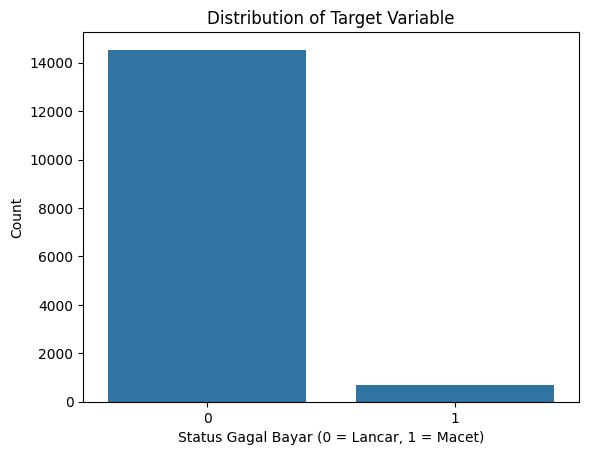

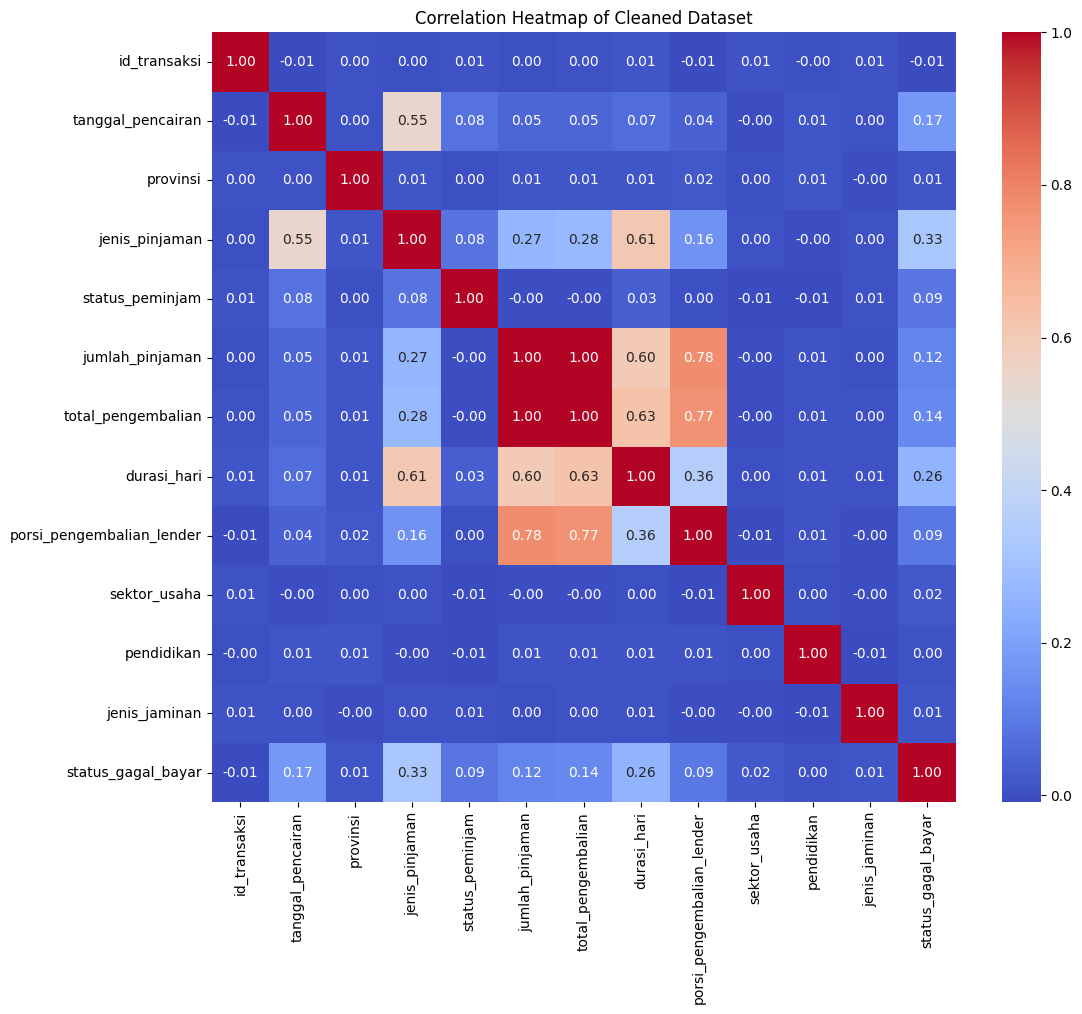

In [20]:
# Plot the distribution of the target variable
sns.countplot(data=dropped_df, x='status_gagal_bayar')
plt.title('Distribution of Target Variable')
plt.xlabel('Status Gagal Bayar (0 = Lancar, 1 = Macet)')
plt.ylabel('Count')
plt.show()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = dropped_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Cleaned Dataset')
plt.show()

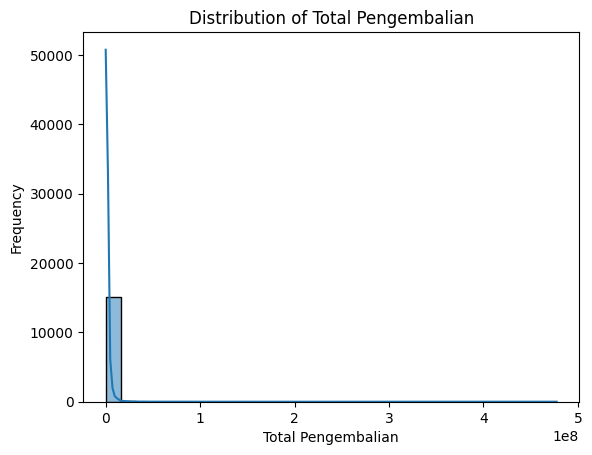

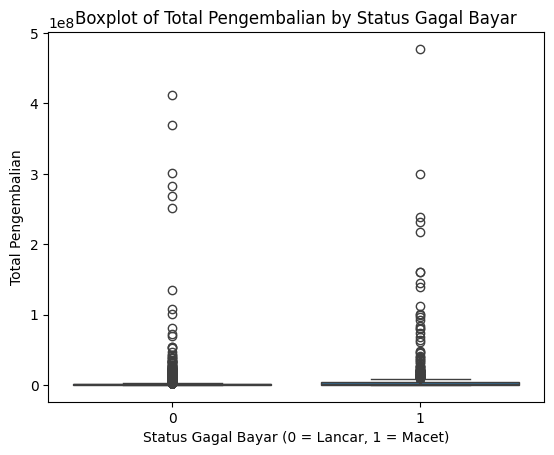

In [21]:
# Plot the distribution of a numerical feature
sns.histplot(data=dropped_df, x='total_pengembalian', kde=True, bins=30)
plt.title('Distribution of Total Pengembalian')
plt.xlabel('Total Pengembalian')
plt.ylabel('Frequency')
plt.show()

# Boxplot for a numerical feature grouped by the target variable
sns.boxplot(data=dropped_df, x='status_gagal_bayar', y='total_pengembalian')
plt.title('Boxplot of Total Pengembalian by Status Gagal Bayar')
plt.xlabel('Status Gagal Bayar (0 = Lancar, 1 = Macet)')
plt.ylabel('Total Pengembalian')
plt.show()

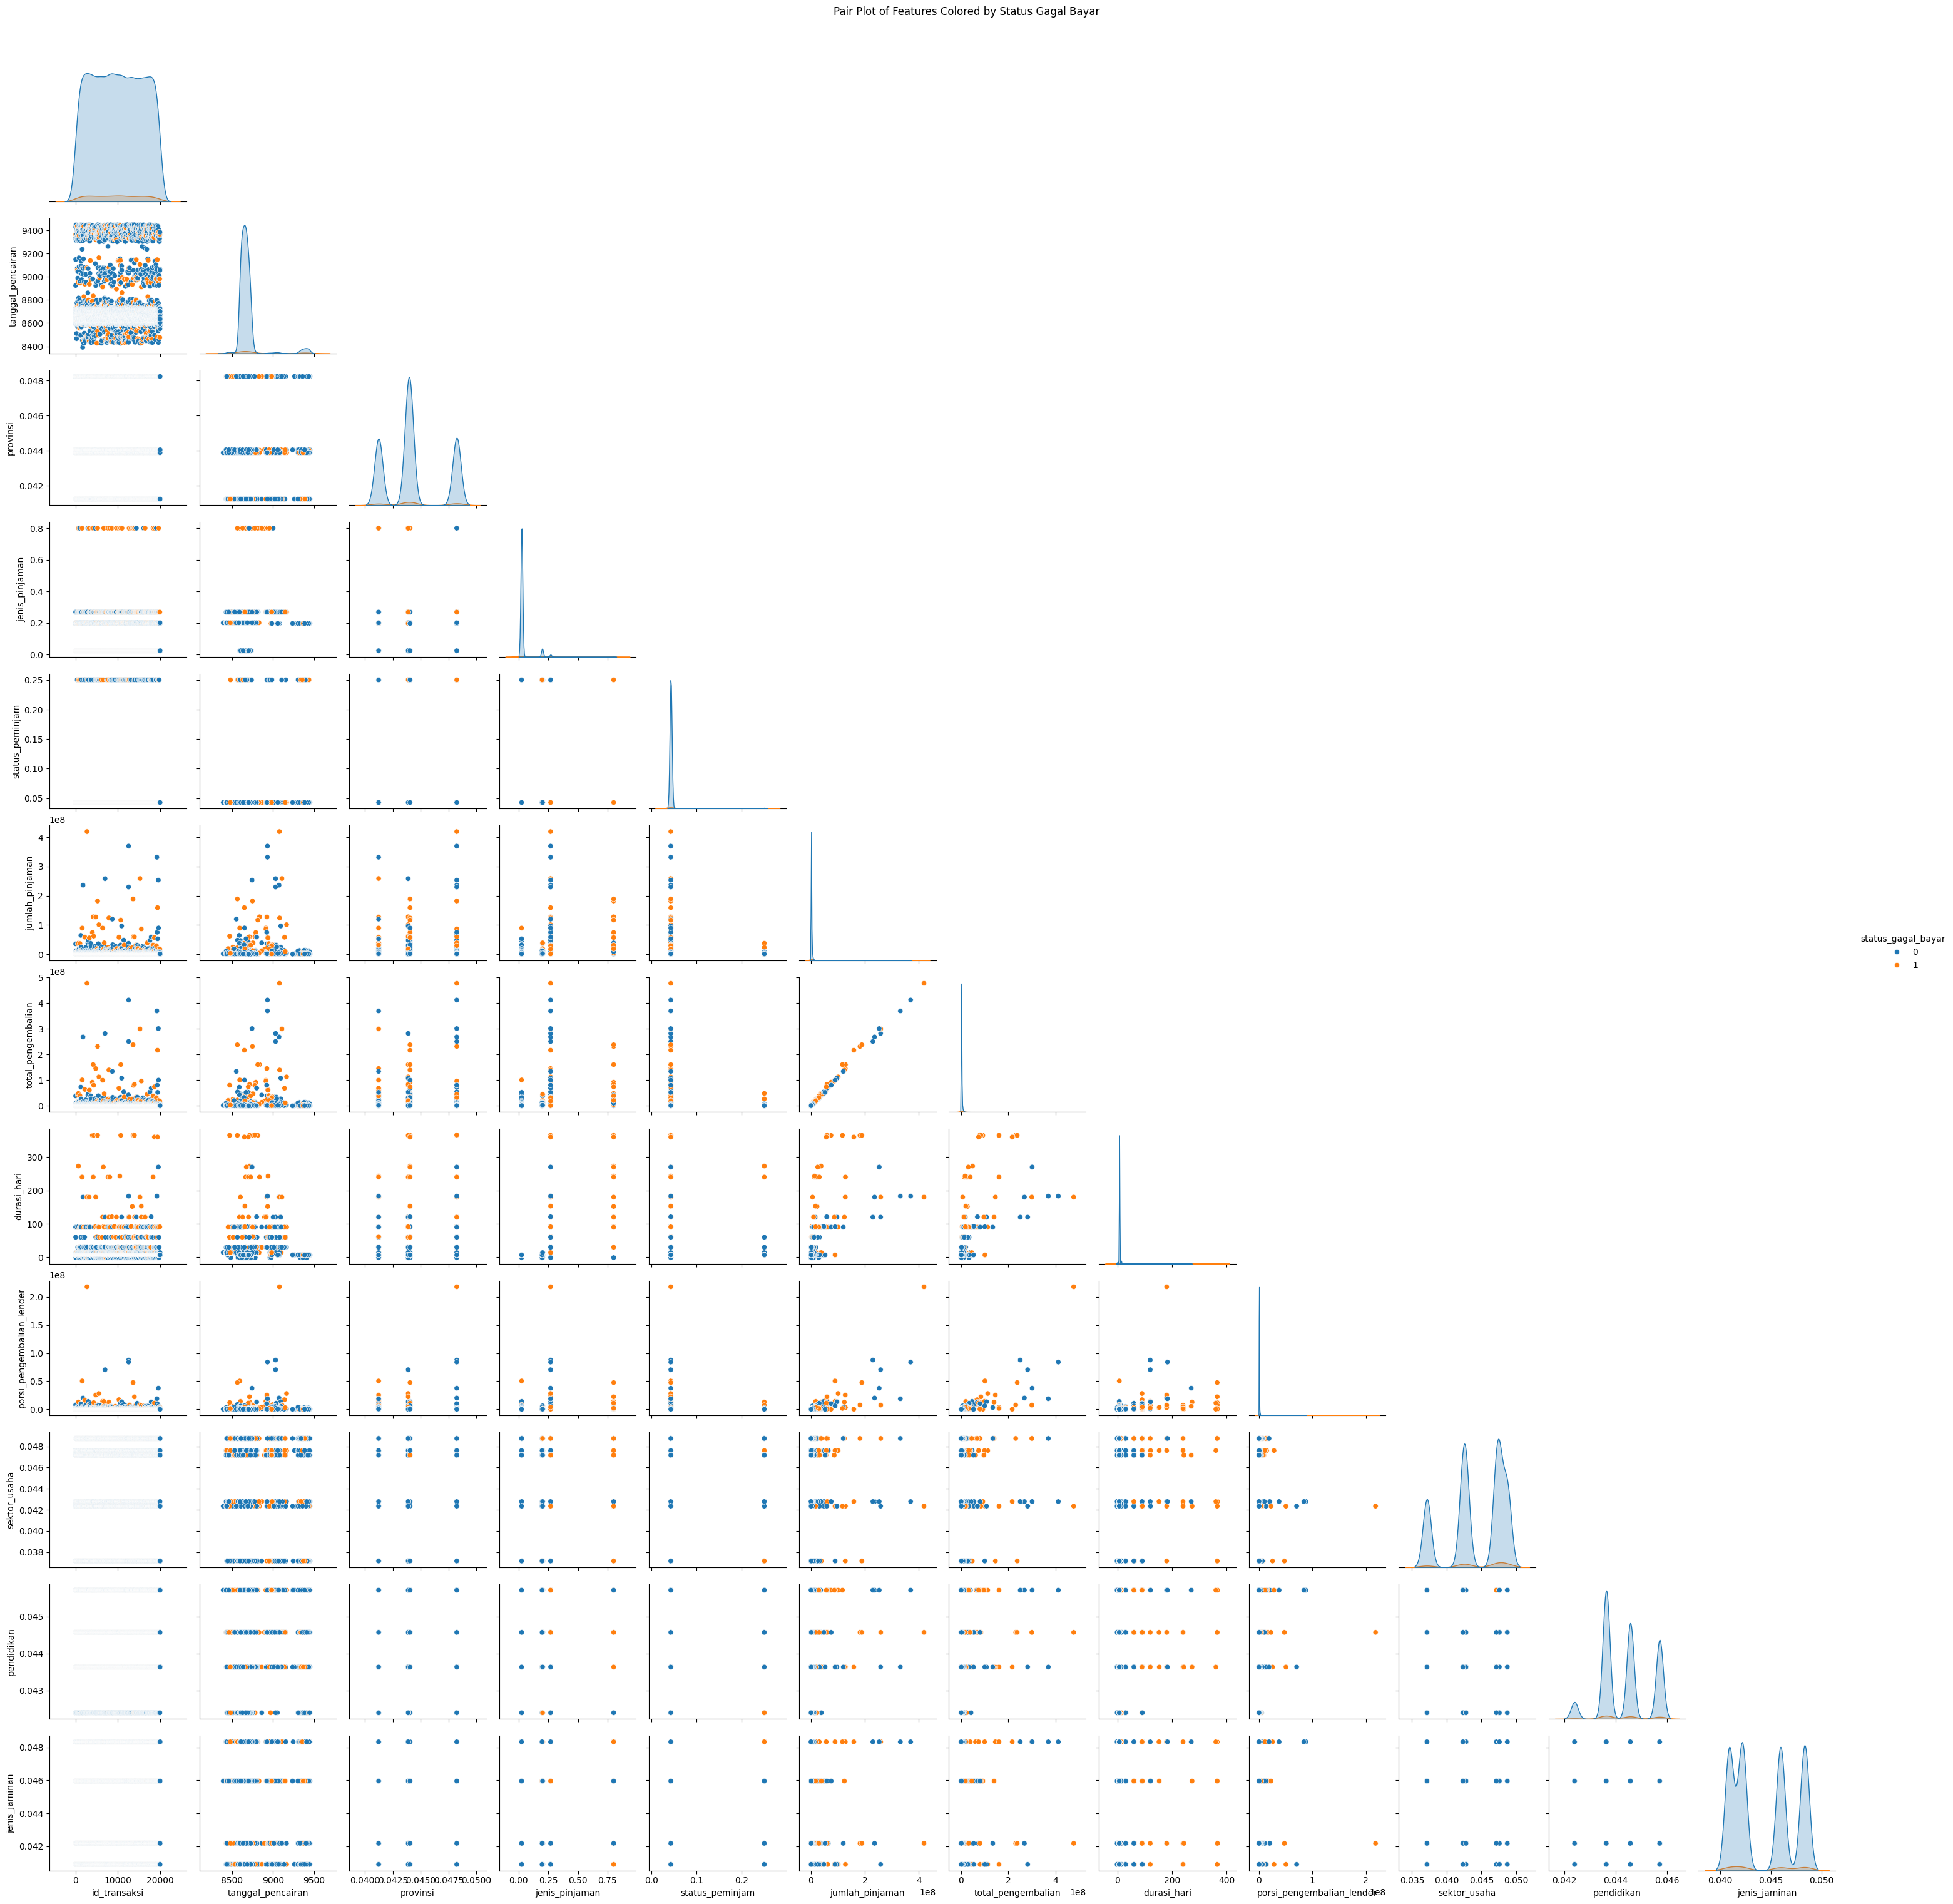

In [22]:
# Pair plot to visualize relationships between features
sns.pairplot(dropped_df, hue='status_gagal_bayar', diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Features Colored by Status Gagal Bayar', y=1.02)
plt.show()

In [23]:
#dropped_df.to_csv("train_preprocessed.csv", index=False)

Drop columns

In [24]:
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15214 entries, 0 to 20011
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_transaksi               15214 non-null  int64  
 1   tanggal_pencairan          15214 non-null  int64  
 2   provinsi                   15214 non-null  float64
 3   jenis_pinjaman             15214 non-null  float64
 4   status_peminjam            15214 non-null  float64
 5   jumlah_pinjaman            15214 non-null  float64
 6   total_pengembalian         15214 non-null  float64
 7   durasi_hari                15214 non-null  float64
 8   porsi_pengembalian_lender  15214 non-null  float64
 9   sektor_usaha               15214 non-null  float64
 10  pendidikan                 15214 non-null  float64
 11  jenis_jaminan              15214 non-null  float64
 12  status_gagal_bayar         15214 non-null  int64  
dtypes: float64(10), int64(3)
memory usage: 1.6 MB


In [ ]:
# Keep encoded features; drop raw categorical columns + id
raw_cat_cols = ['provinsi', 'jenis_pinjaman', 'status_peminjam', 'sektor_usaha', 'pendidikan', 'jenis_jaminan']
df2 = dropped_df.drop(columns=['id_transaksi'] + raw_cat_cols)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15214 entries, 0 to 20011
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tanggal_pencairan          15214 non-null  int64  
 1   jenis_pinjaman             15214 non-null  float64
 2   status_peminjam            15214 non-null  float64
 3   jumlah_pinjaman            15214 non-null  float64
 4   total_pengembalian         15214 non-null  float64
 5   durasi_hari                15214 non-null  float64
 6   porsi_pengembalian_lender  15214 non-null  float64
 7   status_gagal_bayar         15214 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 1.0 MB


In [ ]:
df2.to_csv("train_preprocessed_columns_dropped.csv", index=False)

In [ ]:
# Rebuild train features from raw to ensure encoded columns exist
import pandas as pd
import numpy as np
from category_encoders import CatBoostEncoder
from sklearn.model_selection import KFold

# Reload raw
train_raw = pd.read_csv("adikara-2025-indonesia-kredit-macet/train.csv")

# Apply same cleaning as earlier
train_clean = train_raw.dropna(subset=['total_pengembalian'])
train_clean = train_clean.dropna(subset=['porsi_pengembalian_lender'])
train_clean = train_clean.dropna(subset=['jenis_pinjaman'])
train_clean = train_clean.dropna(subset=['durasi_hari'])

# Date to days since 2000
base_date = pd.Timestamp('2000-01-01')
train_clean['tanggal_pencairan'] = pd.to_datetime(train_clean['tanggal_pencairan'], errors='coerce')
train_clean['tanggal_pencairan'] = (train_clean['tanggal_pencairan'] - base_date).dt.days

# Categorical columns
cat_cols = ['provinsi', 'jenis_pinjaman', 'status_peminjam', 'sektor_usaha', 'pendidikan', 'jenis_jaminan']

# Frequency encoding
for c in cat_cols:
    freqs = train_clean[c].value_counts(normalize=True)
    train_clean[c + '_freq'] = train_clean[c].map(freqs).astype(float).fillna(0.0)

# OOF CatBoost target encoding
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for c in cat_cols:
    te_col = c + '_te'
    train_clean[te_col] = np.nan
    for tr_idx, val_idx in kf.split(train_clean):
        enc = CatBoostEncoder(cols=[c])
        enc.fit(train_clean.iloc[tr_idx][c], train_clean.iloc[tr_idx]['status_gagal_bayar'])
        train_clean.iloc[val_idx, train_clean.columns.get_loc(te_col)] = enc.transform(train_clean.iloc[val_idx][c]).values.ravel()
    # Fill any NaN with global mean
    enc_full = CatBoostEncoder(cols=[c])
    enc_full.fit(train_clean[c], train_clean['status_gagal_bayar'])
    # FIX: pass a DataFrame with the correct column name to transform
    mode_val = train_clean[c].mode().iloc[0]
    global_val = enc_full.transform(pd.DataFrame({c: [mode_val]})).values.ravel()[0]
    train_clean[te_col] = train_clean[te_col].astype(float).fillna(global_val)

# Build df2: drop only raw categorical columns and id
df2 = train_clean.drop(columns=['id_transaksi'] + cat_cols, errors='ignore')

# Save
df2.to_csv("train_preprocessed_columns_dropped.csv", index=False)
print("Saved train_preprocessed_columns_dropped.csv with", df2.shape[1], "columns")
df2.head()

KeyError: 'provinsi'